In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

In [ ]:
file_path = "../data/row/labr_row.csv"
df = pd.read_csv(file_path)

# 2. Initial Data Exploration (2.1)

In [17]:
print("=== Dataset Shape ===")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\n=== First 5 Rows ===")
print(df.head())
print("\n=== Last 5 Rows ===")
print(df.tail())
print("\n=== Column Names & Data Types ===")
print(df.dtypes)

=== Dataset Shape ===
Rows: 63257, Columns: 6

=== First 5 Rows ===
   Unnamed: 0  rating  review_id   user_id   book_id  \
0           0       4  338670838   7878381  13431841   
1           1       4   39428407   1775679   3554772   
2           2       4   32159373   1304410   3554772   
3           3       1  442326656  11333112   3554772   
4           4       5   46492258    580165   3554772   

                                         review_text  
0   "عزازيل الذي صنعناه ،الكامن في أنفسنا" يذكرني...  
1   من أمتع ما قرأت من روايات بلا شك. وحول الشك ت...  
2   رواية تتخذ من التاريخ ،جوًا لها اختار المؤلف ...  
3   إني أقدّر هذه الرواية كثيرا، لسبب مختلف عن أس...  
4   الكاهن الذي أطلق على نفسه اسم هيبا تيمنا بالع...  

=== Last 5 Rows ===
       Unnamed: 0  rating  review_id   user_id  book_id  \
63252       63252       5  108789247   3926131     1420   
63253       63253       3  513749112  16666895  7286365   
63254       63254       3  137280339   4303773  7286365   
63255   

# Check for duplicates

In [18]:
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


# 3. Statistical Analysis (2.2)

In [20]:
# Descriptive statistics for numerical columns
print("\n=== Descriptive Statistics ===")
print(df.describe())


=== Descriptive Statistics ===
         Unnamed: 0        rating     review_id       user_id       book_id
count  63257.000000  63257.000000  6.325700e+04  6.325700e+04  6.325700e+04
mean   31628.000000      3.876535  3.203361e+08  6.965693e+06  6.424708e+06
std    18260.867326      1.142758  1.483920e+08  3.971315e+06  3.931956e+06
min        0.000000      1.000000  1.107140e+05  5.665000e+03  1.510000e+02
25%    15814.000000      3.000000  1.848829e+08  4.030159e+06  3.437956e+06
50%    31628.000000      4.000000  3.343937e+08  5.873259e+06  5.977699e+06
75%    47442.000000      5.000000  4.485754e+08  9.117897e+06  8.013943e+06
max    63256.000000      5.000000  5.643285e+08  1.843574e+07  1.756041e+07



=== Rating Distribution ===
rating
5    23778
4    19054
3    12201
2     5285
1     2939
Name: count, dtype: int64


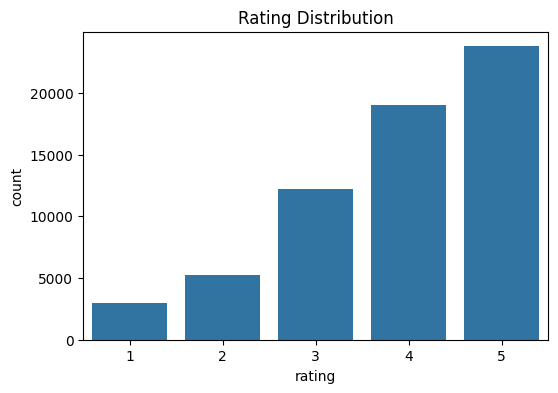

In [21]:
# Rating distribution
print("\n=== Rating Distribution ===")
print(df['rating'].value_counts())
plt.figure(figsize=(6,4))
sns.countplot(x='rating', data=df)
plt.title("Rating Distribution")
plt.show()

In [22]:
# Calculate mean, median, mode, std deviation
print("\nRating Stats:")
print(f"Mean: {df['rating'].mean():.2f}")
print(f"Median: {df['rating'].median():.2f}")
print(f"Mode: {df['rating'].mode()[0]}")
print(f"Std Dev: {df['rating'].std():.2f}")


Rating Stats:
Mean: 3.88
Median: 4.00
Mode: 5
Std Dev: 1.14


In [24]:
# Review length (words and characters)
df['review_length_words'] = df['review_text'].apply(lambda x: len(str(x).split()))
df['review_length_chars'] = df['review_text'].apply(lambda x: len(str(x)))
print("\n=== Review Length Stats (words) ===")
print(df['review_length_words'].describe())
print("\n=== Review Length Stats (characters) ===")
print(df['review_length_chars'].describe())


=== Review Length Stats (words) ===
count    63257.000000
mean        62.002988
std        108.074446
min          1.000000
25%         14.000000
50%         31.000000
75%         67.000000
max       3419.000000
Name: review_length_words, dtype: float64

=== Review Length Stats (characters) ===
count    63257.000000
mean       334.131274
std        587.479047
min          2.000000
25%         73.000000
50%        168.000000
75%        360.000000
max      19088.000000
Name: review_length_chars, dtype: float64


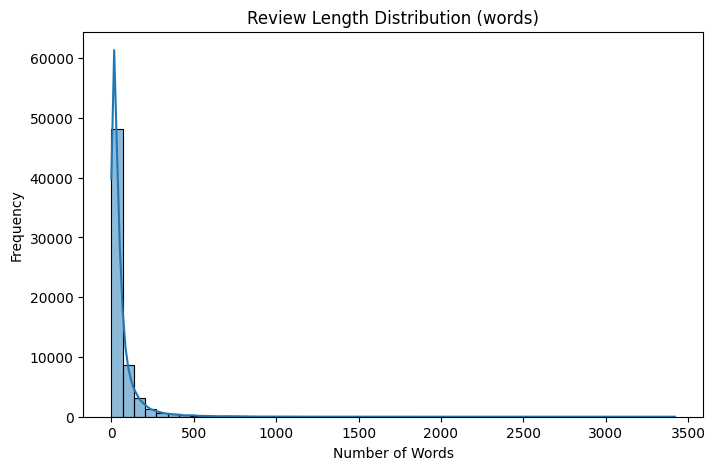

In [25]:
# Histogram of review lengths
plt.figure(figsize=(8,5))
sns.histplot(df['review_length_words'], bins=50, kde=True)
plt.title("Review Length Distribution (words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

In [26]:
# Unique users and books
num_users = df['user_id'].nunique()
num_books = df['book_id'].nunique()
print(f"\nNumber of unique users: {num_users}")
print(f"Number of unique books: {num_books}")


Number of unique users: 16486
Number of unique books: 2131


In [27]:
# User activity (reviews per user)
user_counts = df['user_id'].value_counts()
print("\n=== Reviews per User ===")
print(user_counts.describe())


=== Reviews per User ===
count    16486.000000
mean         3.837013
std          6.150302
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        138.000000
Name: count, dtype: float64


In [28]:
# Book popularity (reviews per book)
book_counts = df['book_id'].value_counts()
print("\n=== Reviews per Book ===")
print(book_counts.describe())


=== Reviews per Book ===
count    2131.000000
mean       29.684186
std        78.562216
min         1.000000
25%         2.000000
50%         6.000000
75%        22.000000
max      1216.000000
Name: count, dtype: float64


# 4. Data Quality Assessment (2.3)

In [29]:
# Missing values per column
print("\n=== Missing Values per Column ===")
print(df.isnull().sum())


=== Missing Values per Column ===
Unnamed: 0             0
rating                 0
review_id              0
user_id                0
book_id                0
review_text            0
review_length_words    0
review_length_chars    0
dtype: int64


In [34]:
# Columns with >30% missing (none expected in LABR)
high_missing = df.isnull().mean() > 0.3
print("\nColumns with >30% missing values:")
print(df.columns[high_missing])


Columns with >30% missing values:
Index([], dtype='object')


In [35]:
# Check rating scale
print("\n=== Rating Scale Check ===")
print(df['rating'].unique())


=== Rating Scale Check ===
[4 1 5 3 2]


In [36]:
# Check for outliers in ratings (should be 1-5)
outliers = df[~df['rating'].isin([1,2,3,4,5])]
print(f"\nNumber of rating outliers: {len(outliers)}")


Number of rating outliers: 0


In [37]:
# Check for inconsistent data formats (review length 0, nulls, etc.)
inconsistent_reviews = df[(df['review_text'].isnull()) | (df['review_length_words']==0)]
print(f"Number of inconsistent reviews: {len(inconsistent_reviews)}")

Number of inconsistent reviews: 0


In [38]:
# Check for non-Arabic text
def has_non_arabic(text):
    return bool(re.search(r'[a-zA-Z]', str(text)))

In [39]:
non_arabic = df['review_text'].apply(has_non_arabic).sum()
print(f"Number of reviews with non-Arabic text: {non_arabic}")

Number of reviews with non-Arabic text: 0
